# The House Price Prediction
## Team 4: Vicky Van Der Wagt, Halee Staggs, Bethany Wang

Changes 12/8/22 By Halee:
* Deleted ordinal correlation and some extra X2 tests
* Added scaled values for numerical data that is correlated with price
* Tested a bunch of models
* Added some visualizations
* Need to add conclusion with final model equation

Changes 12/8/22 By: Bethany
* Remoe outliers before filling missing data
* Added more box plots

Changes 12/8/22 By: Bethany
* Add price_log column and histogram (removed earlier), we should use it as dependent variable for modeling because the log has normal distribution, but the price distribution is skewed
* Used joint plot to detect outliers by location
* Removed outliers by long, so that the data spread across the whole grid
* Moved location categorical variable construction to section 4 'Feature Engineering'
* Removed/Commented out the code to remove outlier by price, we should not do this, because price is dependent variable
* Added a group of box plots

Changes 12/7/22 by Vicky
* Added quick introduction
* Added check for VIF numbers in 

More thoughts for Discussion

* Make loc_cat two dimentional categories, may use 9 categories if not 15 for modeling
* Standardize/normalize data before modeling
* In the modeling step, do some experiments with more variables and different combinations of variables to achieve the best model
** Candidate variables for modeling: sqft_living, loc_cat, bedrooms, bathrooms, floors, grade

Changes 12/6/22 By: Bethany
* Reorganize and clean up the code before the modeling section
* Modify the way to handle missing data and outliers
* Validate the steps for data cleaning
* Added interpretations

Changes 11/19/22
    
*  Inserted data cleaning setps
* Although earlier we talked about replacing missing values with item that correlates to it the most, after looking at graphs, they do not have clear linear relationships. Therefore, I used the averages for now. Will read more projects to see what else they did. 
* Also added discretization (5 categories for longitude, 3 categories for latitude). Then added a loc_cat column (location category) which has the concatenated values. Clear relationship between loc_cat and price
* For duplicate ids, removed the oldest entry and only kept the most recent one. 
* Removed outliers using quartiles in iqr for sqft_living and sqft_lot since those had the most extreme values. Also concluded the 33 bedroom entry was a mistake, as the square footage was less than 2000(definitely could not fit 33 bedrooms). Therefore, replaced it same method as other bedrooms (with average bedrooms). 
* Holding off on deleting most columns until we decide what is relevant to our models


Changes 11/24/22
1. Remove outliers from price. 

2. Updated "yr_renovated" to Yes/No. Only ~900 with yes. 

3. Converted year built to age. Added column.

4. Normalized outcome variable with square root transformation instead of log. Original data was positively skewed, and then log transformed was negatively skewed so log was not the right method.  

5. Reduced dimensions for lat/long location groups. Added a 3X3 grid to compare. There were 3 long/lat groups that only ontained 1 house. By reducing dimensions, it grouped everything so each area is better represented. When looking at the bar chart, there are 4 distinct price levels. I think we can reduce the location dimensions even further into 3 groups (North, Central, South). The prices differences go North-South more so than East-West. This will help with final model to reduce number of dummy variables.

6. Updated numerical/categorical/ordinal lists of variables. 

7. **Most of our variables are discrete. We cannot compute mean and standard deviation for them. Udated missing values to fill with median. Use PMF for distributions. Median house prices for Washington state listed here: https://ofm.wa.gov/washington-data-research/statewide-data/washington-trends/economic-trends/median-home-price. 2014 = 267,600 and 2015 = 289,100. Maybe we can use this as some sort of cut-off. Add binary variable of above median or below median?? Combine with location?? ** 

8. Ordinal variables can be used in correlations. Added them to the numerical correlation matrix. However, ordinal data is not 100% valid to use in linear regression. Grade is correlated with price, but not rating. 

9. We cannot use price/sqft for a predictor variable. This would mean that we are using a dimension of our dependent variable inside our model, which is invalid. Just stick to continuous measurement of sqft living separate from price. Commented out this section and updated price vs. price/log histogram display.  

10. Tested Spearman rank correlation between ordinal variables (grade and rating). No relationship found. 

11. Added Chi-Square tests for categorical variables to test relationship with price, location, and other categories. Used log-normal price data for test. Turned "price" into categorical with 6 bins to test relationships. 6 bins = 3 SD on each side, so basically 100% of data. The year 2014 contains months from only May-Dec, and 2015 contains months from January to May. This means we cannot use "year" for any meaningful comparison. Together they create a full year of data. Confirmed with x2 test. Also tested month on its own. Month shows a difference in x2 test. Formal test of Vicky's percentage differences.  

12. Normalized sqft_living before modeling with square root transformation.

13. Testing relationship between all predictor variables with x2 conversion. 

14. Final proposed predictor variables: sqft_living - log, location, yr_sold.

15. Ran multinomial linear regression. price_log ~ sqft_log + locations(dummy) + yr_sold + e

16. Added data visualizations.

17. Added conclusion. 

Changes 11/27/22

1. Added 'season' column derived from the month column. (Under Feature Construction and Discretization)

## 1. Introduction

The aim of this project was to build a regression to model house prices in King's County, Washington. The dataset utilized to develop the model contained data for houses that were sold between 2014 and 2015. Therefore, if this model is to predict prices for latter years, that needs to be taken into account and prices need to be normalized. The provided dataset first had to be organized and cleaned accordingly, as there many missing and duplicate values. Some missing variables could be derived from known values, while others were imputed in the manner we felt most reasonable. Exploratory data analysis was then performed, and data was cleaned further and additional features were transformed before fine-tuning the final model. 

## 2. Data Importing and Cleaning

* Import dataset and describe characteristics such as dimensions, data types, file types, and import methods used
* Clean, wrangle, and handle missing data
* Transform data appropriately using techniques such as aggregation, normalization, and feature construction
* Reduce redundant data and perform need-based discretization

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
from scipy.stats import spearmanr
import statsmodels.api as sm

In [2]:
# To ignore the warning message
warnings.filterwarnings('ignore')

### Import data

In [3]:
dataset = pd.read_csv(r'house_sales.csv')
dataset.shape

(21613, 21)

### Check data characteristics

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       20479 non-null  float64
 4   bathrooms      20545 non-null  float64
 5   sqft_living    20503 non-null  float64
 6   sqft_lot       20569 non-null  float64
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Check missing data

In [6]:
dataset.isnull().sum()

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

We detect missigng data in four columns: bedrooms, bathrooms, sqft_living, sqft_lot. Here are the strategies to handle the missing data:
* Fill the missing values in sqft_living: sqft_living = sqft_above +sqft_basement
* Check and remove outliers from sqft_living column: remove 1.5IQR above
* Check distribution of sqft_living and divide it into different groups by size range: 0-999, 1000-1999, ...
* Fill sqft_lot with the mean of the the corresponding size range group
* Fill bedrooms with the median of the the corresponding size range group
* Fill bathrooms with the median of the the corresponding size range group

### Remove Outliers and Handle Missing Data

#### * Fill the missing values in sqft_living: sqft_living = sqft_above +sqft_basement

In [7]:
sqft_above_col = dataset['sqft_above']
sqft_basement_col = dataset['sqft_basement']
dataset['sqft_living'].fillna(sqft_above_col + sqft_basement_col, inplace = True)

#### * Remove outliers from sqft_living column: use 7000 as the upperlimit accoriding to the scatter plot

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

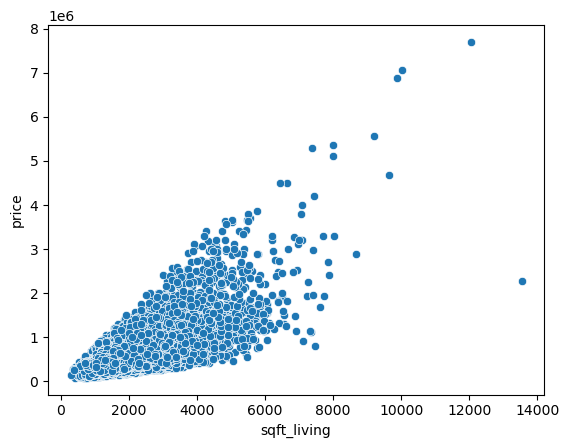

In [8]:
# Use scatter plot to check distribution of sqft_living
sns.scatterplot(data=dataset, x="sqft_living", y="price")

In [9]:
# Calculate IQR
q1 = dataset['sqft_living'].quantile(.25)
q3 = dataset['sqft_living'].quantile(.75)
iqr = q3 - q1
upperlimit = q3 + (1.5 * iqr)
upperlimit_count = len(dataset[dataset.sqft_living > upperlimit])
print(f"Upper limit by 1.5IQR = {upperlimit}, count = {upperlimit_count}")

Upper limit by 1.5IQR = 4234.5, count = 572


We use 7000 as the upperlimit to define outliers instead of using 1.5IQR

In [10]:
upperlimit1 = 7000
dropped_count = len(dataset[dataset.sqft_living > upperlimit1])
dropped_percent = dropped_count / len(dataset)
print(f"{dropped_count} rows ({round(100 * dropped_percent, 3)} percent of data) have been dropped.")

dataset = dataset[dataset['sqft_living'] < upperlimit1]

dataset['sqft_sqrt'] = np.sqrt(dataset['sqft_living'])
dataset.shape

28 rows (0.13 percent of data) have been dropped.


(21584, 22)

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

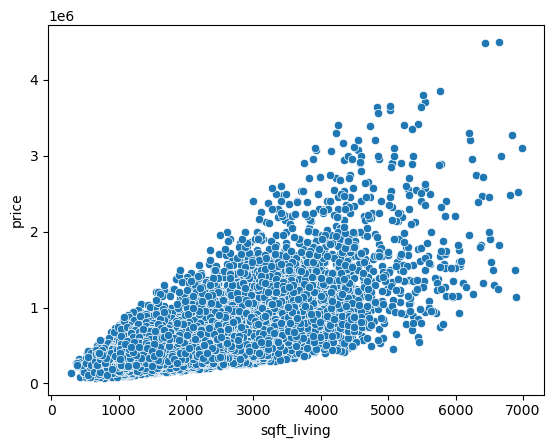

In [11]:
# Recheck sqft_living distribution
sns.scatterplot(data=dataset, x="sqft_living", y="price")

#### * Check sqft_lot distribution

<AxesSubplot:xlabel='sqft_lot', ylabel='price'>

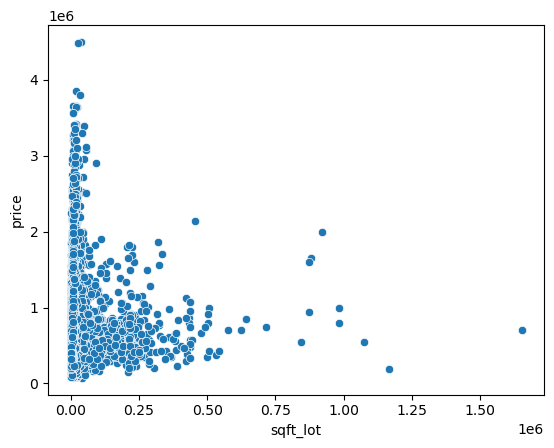

In [12]:
sns.scatterplot(data=dataset, x="sqft_lot", y="price")

#### * Remove outliers from sqft_lot column: use 500000 as the upperlimit accoriding to the scatter plot

In [13]:
#removed outliers with large sqft_lots
q1 = dataset['sqft_lot'].quantile(.25)
q3 = dataset['sqft_lot'].quantile(.75)
iqr = q3 - q1
upperlimit = q3 + (1.5*iqr)
upperlimit_count = len(dataset[dataset.sqft_lot > upperlimit])
print(f"Upper limit by 1.5IQR = {upperlimit}, count = {upperlimit_count}")

Upper limit by 1.5IQR = 19098.125, count = 2310


In [14]:
# dataset = dataset[dataset['sqft_living']<upperlimit]
upperlimit_set = 500000
upperlimit_set_count = len(dataset[dataset.sqft_lot > upperlimit_set])
print(f"Upper limit_set={upperlimit_set}, count = {upperlimit_set_count}")
dropped_count = len(dataset[dataset.sqft_lot > upperlimit_set])
dropped_percent = dropped_count / len(dataset)
print(f"{dropped_count} rows ({round(100 * dropped_percent, 3)} percent of data) have been dropped.")

dataset.drop(dataset[dataset.sqft_lot > upperlimit_set].index, inplace=True)


Upper limit_set=500000, count = 20
20 rows (0.093 percent of data) have been dropped.


<AxesSubplot:xlabel='sqft_lot', ylabel='price'>

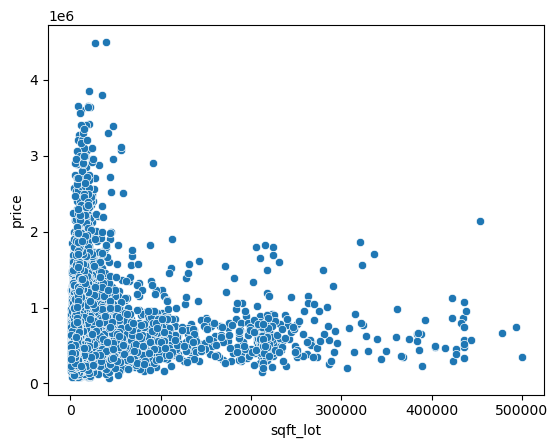

In [15]:
sns.scatterplot(data=dataset, x="sqft_lot", y="price")

#### * Remove outliers from bedrooms  columns

<AxesSubplot:title={'center':'Boxplots'}, xlabel='Bedrooms', ylabel='Counts'>

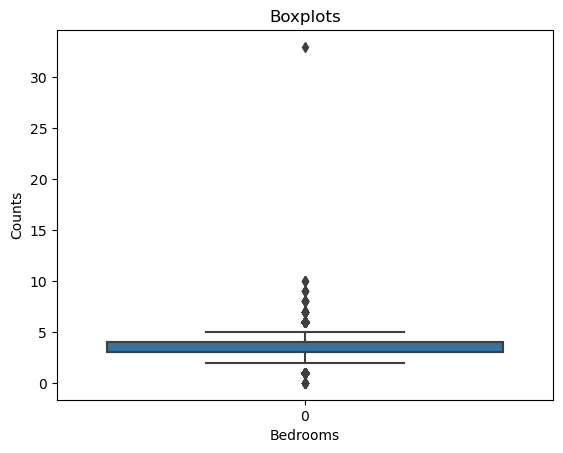

In [16]:
# Use boxplot to check outliers
plt.figure()
plt.title('Boxplots')
plt.xlabel('Bedrooms')
plt.ylabel('Counts')
sns.boxplot(data = dataset['bedrooms'])

From the box plot, any house with more than 6 bedrooms or 0 bedrooms can be counted as an outlier

In [17]:
# Check outliers' count
bedroom_drop_count = len(dataset[(dataset['bedrooms'] > 6) | (dataset['bedrooms'] == 0)])
data_count = len(dataset)
bedroom_drop_count_percent = round(100 * bedroom_drop_count/data_count, 2)

print(f"bedroom_drop_count= {bedroom_drop_count},  Percent={bedroom_drop_count_percent}%")

bedroom_drop_count= 64,  Percent=0.3%


In [18]:
# Drop outliers
dataset = dataset[(dataset['bedrooms'] <= 6) & (dataset['bedrooms'] > 0)]

#### * Remove outliers from bathrooms column

<AxesSubplot:title={'center':'Boxplots'}, xlabel='Bathrooms', ylabel='Counts'>

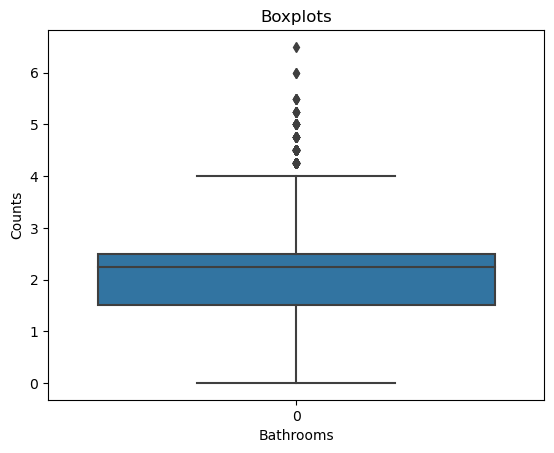

In [19]:
plt.figure()
plt.title('Boxplots')
plt.xlabel('Bathrooms')
plt.ylabel('Counts')
sns.boxplot(data = dataset['bathrooms'])

From the box plot, any house with more than 4 bathrooms or less than 1 bathrooms can be counted as an outlier

In [20]:
# Check outlier counts
bathroom_drop_count = len(dataset[(dataset['bathrooms'] >4) | (dataset['bathrooms'] < .75)])
bathroom_drop_count_percent = round(100 * bathroom_drop_count/data_count, 2)
print(f"bathroom_drop_count= {bathroom_drop_count},  Percent= {bathroom_drop_count_percent}%")


bathroom_drop_count= 216,  Percent= 1.0%


In [21]:
#Drop outliers
dataset = dataset[ (dataset['bathrooms'] <= 4) & (dataset['bathrooms'] >= .75) ]

dataset.shape

(19150, 22)

#### * Add a column  indicating the sqft_living range: 0 (0-999), 1000 (1000-1999), 2000(2000-2999) ... 6000(6000-6999)

In [22]:
dataset['sqft_living_range'] = (dataset['sqft_living']//1000) * 1000


####  * Impute missing data in bathrooms, bedrooms, sqft_lot with the mean/median by sqft_living_range


In [23]:
# Get unique range list
ranges = dataset['sqft_living_range'].unique()
imputed_dfs = []

for size_range in ranges:
    range_df = dataset[dataset['sqft_living_range'] == size_range]
    range_df['bathrooms'].fillna(range_df['bathrooms'].median(), inplace = True)
    range_df['bedrooms'].fillna(range_df['bedrooms'].median(), inplace = True)
    range_df['sqft_lot'].fillna(range_df['sqft_lot'].mean(), inplace = True)
      
    imputed_dfs.append(range_df)

#Combine all the region subset back into a new dataframe
dataset = pd.concat(imputed_dfs, axis=0)
dataset.isnull().sum()                                                  

id                   0
date                 0
price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
view                 0
condition            0
grade                0
sqft_above           0
sqft_basement        0
yr_built             0
yr_renovated         0
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
sqft_sqrt            0
sqft_living_range    0
dtype: int64

#### * Drop duplicate id

In [24]:
#dropping the earliest entry of each duplicate ID 
dataset.sort_values(by=['id', 'date'], inplace=True)
#keeping the entry with the most recent date
dataset = dataset.drop_duplicates(subset=['id'], keep='last')
dataset.shape


(19005, 23)

* Drop redundant data columns: 

In [25]:
dataset.drop(['sqft_above', 'sqft_basement'], axis=1, inplace = True)

### Feature Construction

#### * Add columns for year sold, month sold, and season

In [26]:
from datetime import datetime
dataset['date'] = pd.to_datetime(dataset['date'], format='%Y/%m/%d')

In [27]:
dataset['yr_sold'] = pd.DatetimeIndex(dataset['date']).year
dataset['month_sold'] = pd.DatetimeIndex(dataset['date']).month


dataset['month_sold'] = dataset['month_sold'].astype(str)
look_up = {'1': 'Winter', '2': 'Winter', '3': 'Spring', '4': 'Spring', '5': 'Spring', 
           '6': 'Summer', '7': 'Summer', '8': 'Summer', '9': 'Fall', '10': 'Fall', '11': 'Fall', '12': 'Winter'}

dataset['season'] = dataset['month_sold'].apply(lambda x: look_up[x])
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_sqrt,sqft_living_range,yr_sold,month_sold,season
2497,1000102,2015-04-22,300000.0,6.0,3.00,2400.0,9373.0,2.0,0,0,...,98002,47.3262,-122.214,2060,7316,48.989795,2000.0,2015,4,Spring
6735,1200019,2014-05-08,647500.0,4.0,1.75,2060.0,26036.0,1.0,0,0,...,98166,47.4444,-122.351,2590,21891,45.387223,2000.0,2014,5,Spring
8411,1200021,2014-08-11,400000.0,3.0,1.00,1460.0,43000.0,1.0,0,0,...,98166,47.4434,-122.347,2250,20023,38.209946,1000.0,2014,8,Summer
8809,2800031,2015-04-01,235000.0,3.0,1.00,1430.0,7599.0,1.5,0,0,...,98168,47.4783,-122.265,1290,10320,37.815341,1000.0,2015,4,Spring
18521,3600072,2015-03-30,680000.0,4.0,2.75,2220.0,5310.0,1.0,0,0,...,98144,47.5801,-122.294,1540,4200,47.116876,2000.0,2015,3,Spring


#### * Add column to change year renovated to binary variable

In [28]:
#update dataset to Yes/No for renovated
dataset["renovate"] = pd.cut(dataset["yr_renovated"],2,labels = ['0','1'])
dataset["renovate"] = pd.to_numeric(dataset['renovate'])

#### * Add new column house_age = yr_sold - yr_built

In [29]:
t1 = dataset['yr_sold']
t2 = dataset['yr_built']
house_age = t1 - t2
dataset['house_age'] = house_age
dataset[['yr_sold', 'yr_built', 'house_age']].head()

,yr_sold,yr_built,house_age
2497,2015,1991,24
6735,2014,1947,67
8411,2014,1952,62
8809,2015,1930,85
18521,2015,1951,64


## 3. Exploratory Data Analysis and Visualization

* Identify categorical, ordinal, and numerical variables within the data
* Provide measures of centrality and distribution with visualizations
* Diagnose for correlations between variables and determine independent and dependent variables
* Perform exploratory analysis in combination with visualization techniques to discover patterns and features of interest

### Classify features

#### * Classify variables as categorical, ordinal, continues and discrete variables within the prepared dataset

In [30]:
# Identify categorical, ordinal, continues and discrete variables within the prepared data
cont_vars = ['price', 'sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'house_age']
discrete_vars = ['bedrooms', 'bathrooms', 'floors', 'yr_sold', 'month_sold']
ordinal_vars = ['condition', 'grade']
cat_vars = ['waterfront', 'view', 'zipcode', 'loc_cat', 'season']

### Statistical Analysis

#### * Get statistics on the continous numerical variables, house_age is discrete, but can be used as continuous type

In [31]:
cont_subset = dataset[cont_vars]

In [32]:
# Find the statistics for the numerical variables
round(cont_subset.describe(), 2)

,price,sqft_living,sqft_lot,sqft_living15,sqft_lot15,house_age
count,19005.00,19005.00,19005.00,19005.00,19005.00,19005.00
mean,525928.58,2042.93,14104.74,1971.30,12372.42,43.57
std,320477.52,843.70,30923.91,664.14,24913.79,29.36
min,78000.00,370.00,520.00,399.00,659.00,-1.00
25%,320600.00,1420.00,5109.00,1480.00,5100.00,18.00
50%,450000.00,1900.00,7794.00,1830.00,7592.00,40.00
75%,635000.00,2514.00,10766.00,2340.00,10000.00,63.00
max,4489000.00,6840.00,499571.00,5790.00,438213.00,115.00


### Correlation Analysis

In [33]:
# Find correlation coefficients between variables
corr_check_cols = cont_vars + discrete_vars + ordinal_vars

corr_check_subset = dataset[corr_check_cols]
round(corr_check_subset.corr(), 2)

,price,sqft_living,sqft_lot,sqft_living15,sqft_lot15,house_age,bedrooms,bathrooms,floors,yr_sold,condition,grade
price,1.00,0.67,0.09,0.59,0.07,-0.04,0.30,0.48,0.25,0.01,0.04,0.66
sqft_living,0.67,1.00,0.18,0.76,0.17,-0.33,0.59,0.73,0.35,-0.03,-0.06,0.75
sqft_lot,0.09,0.18,1.00,0.17,0.77,-0.06,0.04,0.08,-0.01,-0.00,-0.02,0.12
sqft_living15,0.59,0.76,0.17,1.00,0.19,-0.32,0.40,0.56,0.28,-0.02,-0.09,0.70
sqft_lot15,0.07,0.17,0.77,0.19,1.00,-0.07,0.03,0.07,-0.02,-0.00,-0.00,0.11
house_age,-0.04,-0.33,-0.06,-0.32,-0.07,1.00,-0.17,-0.53,-0.49,0.02,0.36,-0.45
bedrooms,0.30,0.59,0.04,0.40,0.03,-0.17,1.00,0.51,0.17,-0.01,0.03,0.36
bathrooms,0.48,0.73,0.08,0.56,0.07,-0.53,0.51,1.00,0.51,-0.03,-0.13,0.65
floors,0.25,0.35,-0.01,0.28,-0.02,-0.49,0.17,0.51,1.00,-0.03,-0.26,0.46
yr_sold,0.01,-0.03,-0.00,-0.02,-0.00,0.02,-0.01,-0.03,-0.03,1.00,-0.05,-0.03


<AxesSubplot:title={'center':'Heat Map of Correlation Coefficients'}>

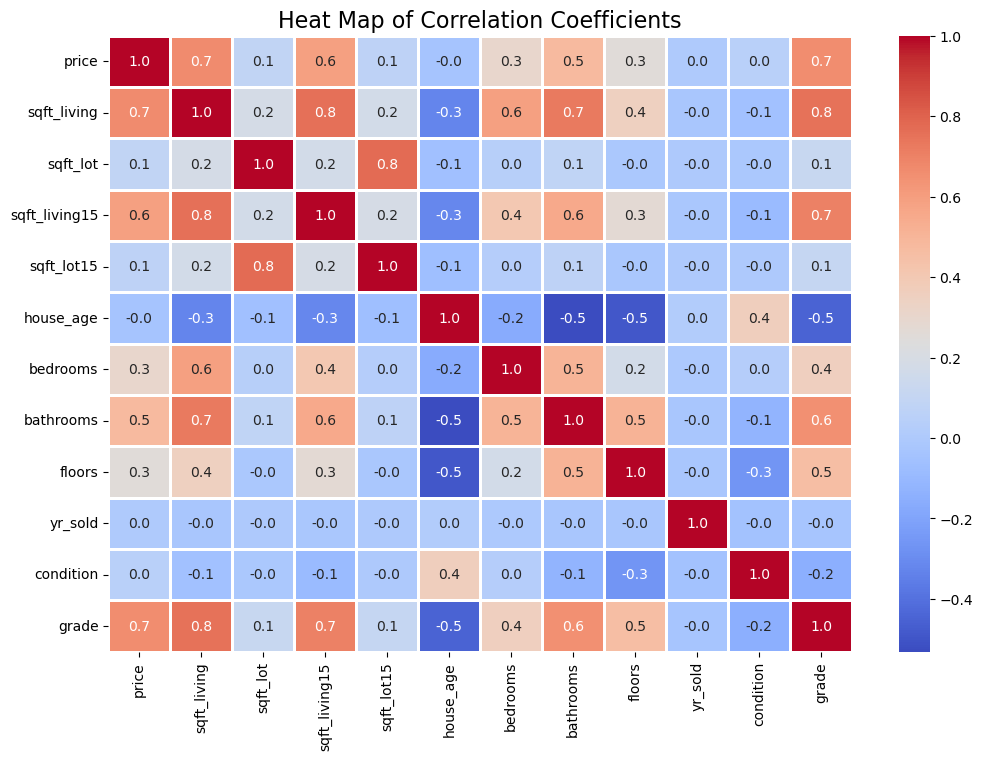

In [34]:
# Heatmap for correlations from original data
plt.figure(figsize=(12, 8))
plt.title("Heat Map of Correlation Coefficients", fontsize=16)
sns.heatmap(corr_check_subset.corr(), cmap = 'coolwarm', fmt = '.1f', linewidths = 1, annot = True)

From the heatmap, we see:
* Almost no correlation between dependent variable 'price' and independent variables: sqft_lot, house_age, condition, yr_sold, sft_lot15, therefore these variables will not be selected for modeling
* There are strong correlation between sqft_living and sqft_living15, between sqft_lot and sqft_lot15, therefore, we conclude that sqft_living15 and sqft_lot15 are redundant and should not be used in modeling

* There are strong correlation between dependent variable 'price' and independent variables: sqft_living, bathrooms, and grade, therefore these variables will be kept for modeling
* There are weak correlation between dependent variable 'price' and independent variables: bedrooms and floors. These variables will be kept for modeling

### Scatter Plots for Numerical Variables vs. Price

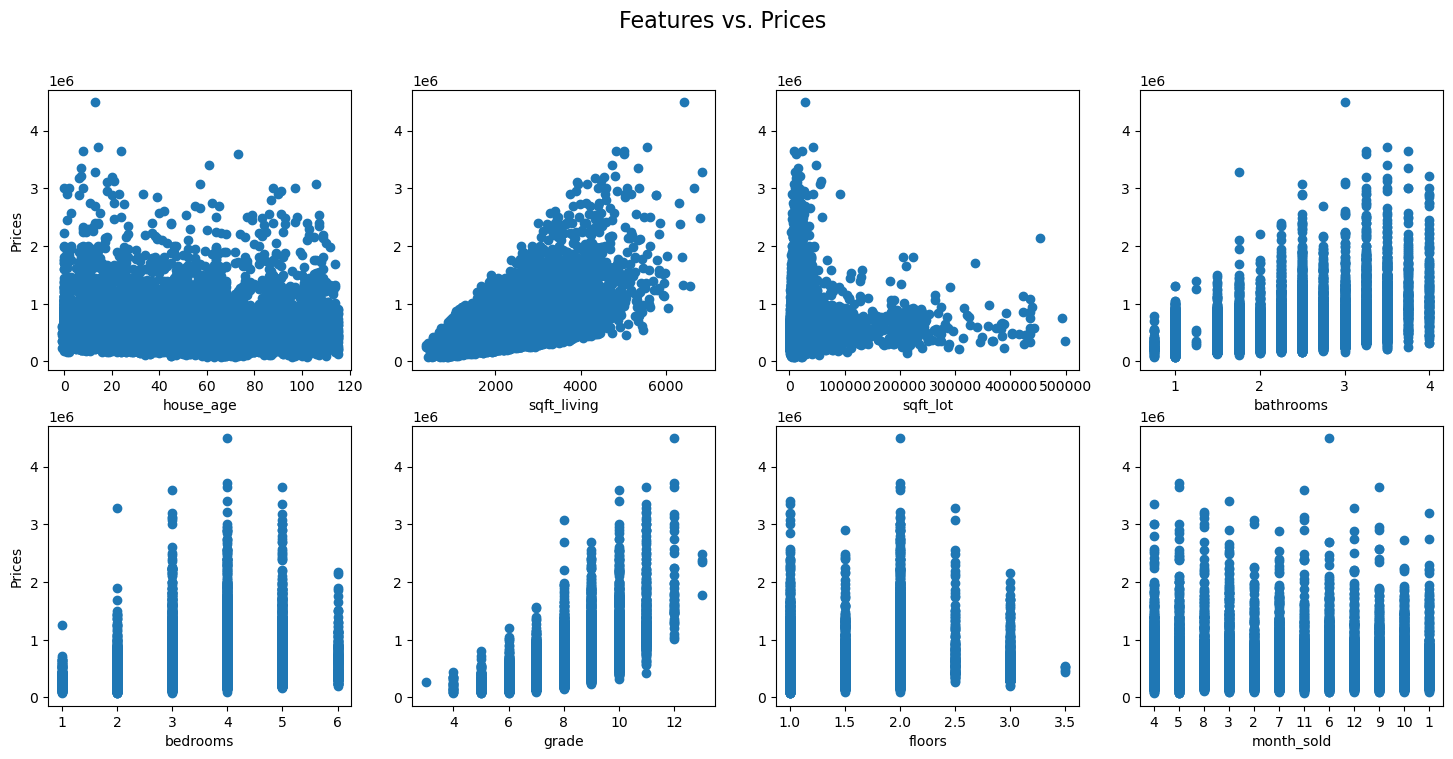

In [35]:
scatter_cols = ['house_age', 'sqft_living', 'sqft_lot', 'bathrooms', 'bedrooms', 'grade', 'floors', 'month_sold']
pair_cols = ['sqft_living', 'sqft_lot', 'grade', 'condition']

#Create scatter plots
fig,axes = plt.subplots(nrows=2,ncols=4,figsize=(18,8))
fig.suptitle("Features vs. Prices",fontsize=16)

#for n in range(len(scatter_cols)):
for n in (0,1,2,3,4,5,6,7):   
    i = 0 if n < 4 else 1  
    j = n % 4;
    axes[i][j].scatter(dataset[scatter_cols[n]], dataset['price'])
    axes[i][j].set_xlabel(scatter_cols[n])
    
axes[0][0].set_ylabel("Prices")
axes[1][0].set_ylabel("Prices")

plt.show()

The scatter plots shows that there is a linear relationship between dependent variable 'price' and independent variables 'sqft_living', 'bathrooms', and, 'grade'. There is no obvious linear relationship between price and the other variables listed above.

### Histogram Distribution for price and sqft_living

In [36]:
# Separate Prices into a new variable
prices = dataset['price']

<AxesSubplot:title={'center':'Distribution of Prices'}, xlabel='price'>

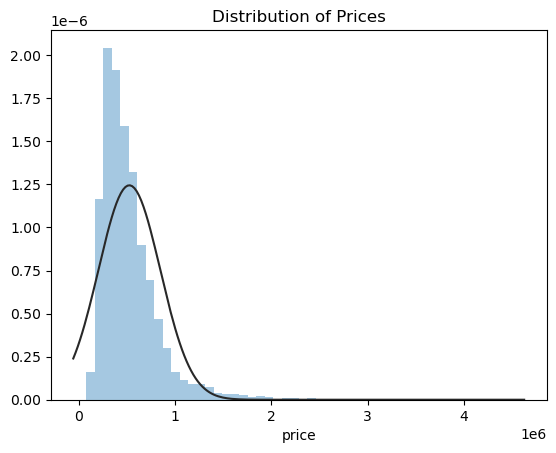

In [37]:
# Display Histogram for Prices
plt.figure(1)
plt.title('Distribution of Prices')
sns.distplot(prices, kde=False, fit=stats.norm)

Because the linear regression model requires that the dependent variable need to have a normal distribution. the distribution of the price is right skewed, therefore, we will try a log transformation on it.

#### Log transformation on price

<AxesSubplot:title={'center':'Distribution of price_log'}, xlabel='price_log'>

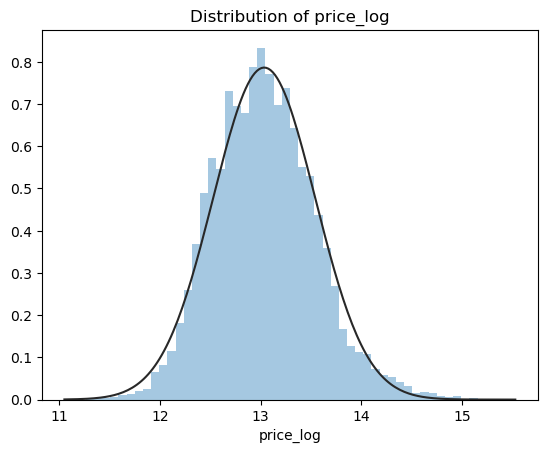

In [38]:
# Add a new column 'price_log'
dataset['price_log'] = np.log(dataset['price'])

# Display Histogram for Sqft_Living
plt.figure(2)
plt.title('Distribution of price_log')
sns.distplot(dataset['price_log'], kde=False, fit=stats.norm)

We see a normal distribution curve for price_log, therefore, price_log will be used for modeling.

### Bar Plots for Categorical and Discrete Variables

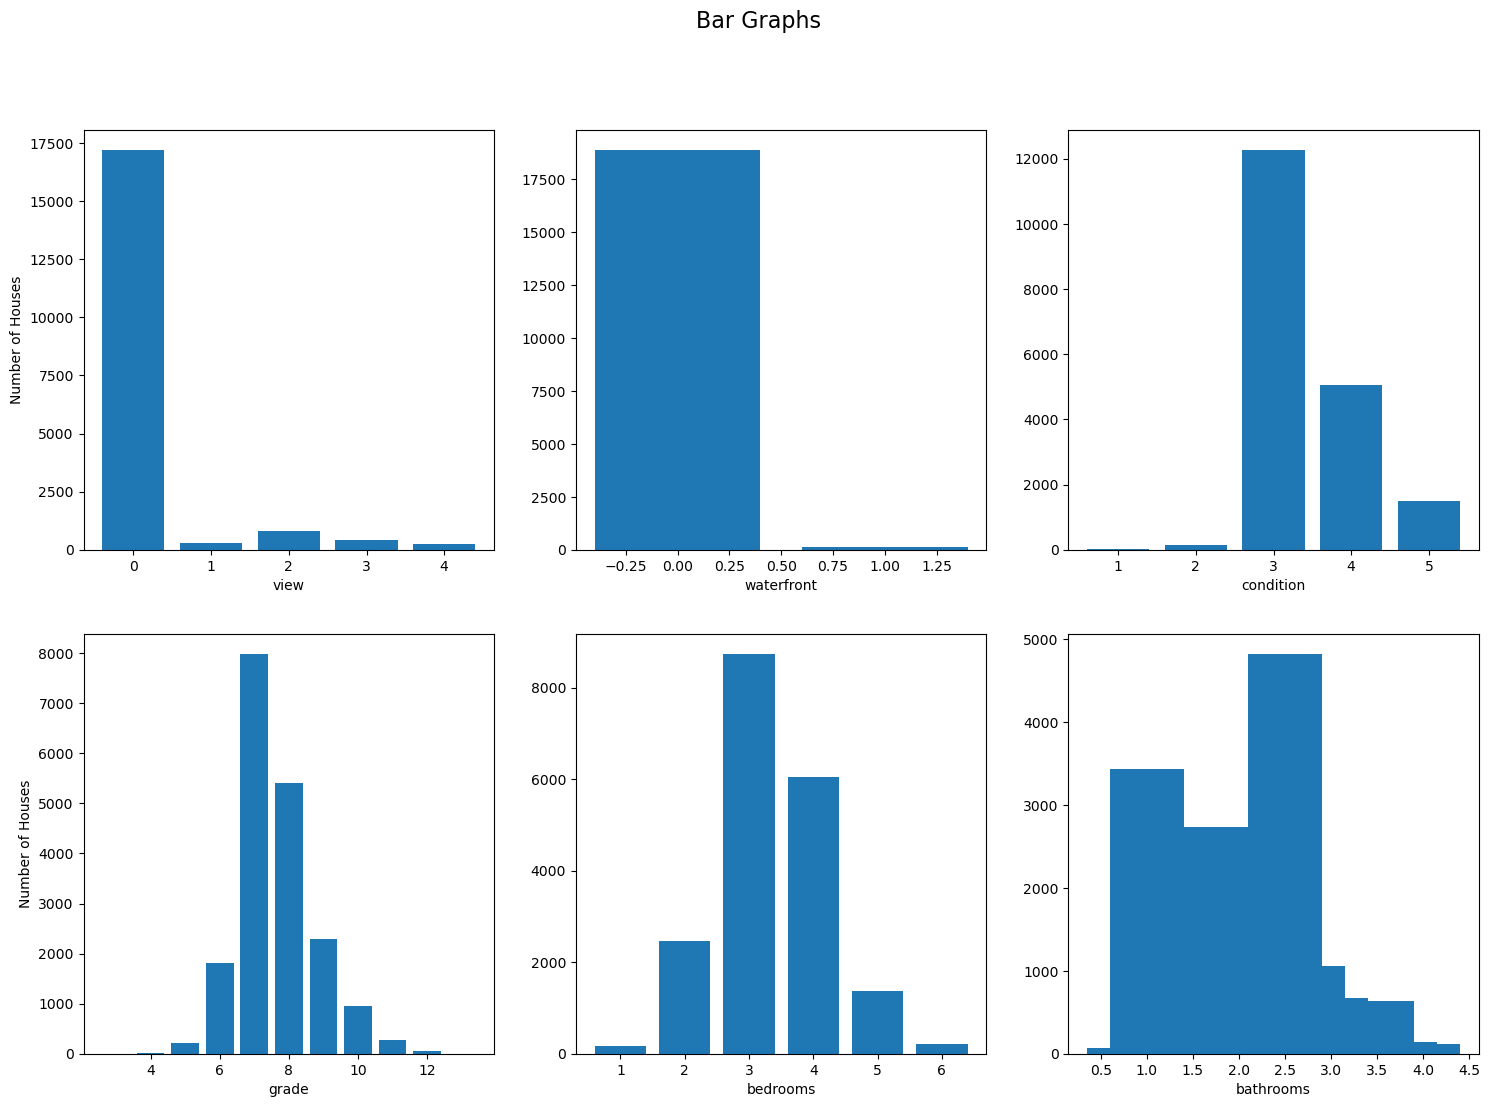

In [39]:
# Define column lists for plotting
bar_cols = ['view', 'waterfront', 'condition', 'grade', 'bedrooms', 'bathrooms']

# Create bar plots
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(18,12))
fig.suptitle("Bar Graphs",fontsize=16)

for n in (0, 1,2,3,4,5):
    i = 0 if n < 3 else 1  
    j = n % 3;
    values = dataset[bar_cols[n]].value_counts()
    pd.Series.sort_index(values, inplace=True)
    indexes = list(values.index)
    axes[i][j].bar(indexes, values)
    axes[i][j].set_xlabel(bar_cols[n])
    
axes[0][0].set_ylabel("Number of Houses")
axes[1][0].set_ylabel("Number of Houses")

plt.show()

From bar plot for view and water front, we see majority of the housed do not have view or by water front, therefore, these two features will not use considered in modeling

### Box Plot for Bedrooms, Bathrooms, Grade, and Condition

[(0.0, 1500000.0)]

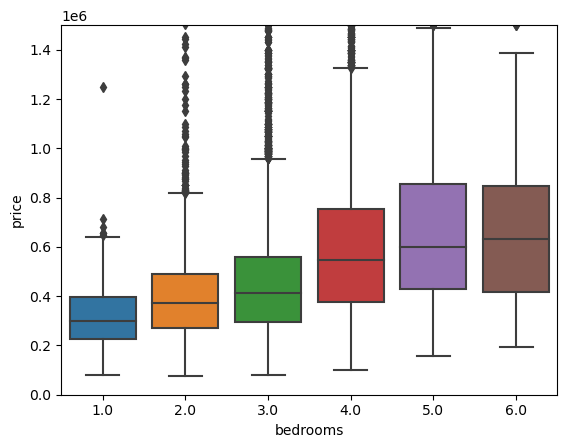

In [40]:
# Display box plot for 'bedrooms'
plot = sns.boxplot(x='bedrooms', y='price', data=dataset)
plot.set(ylim=(0, 1500000))

[(0.0, 1500000.0)]

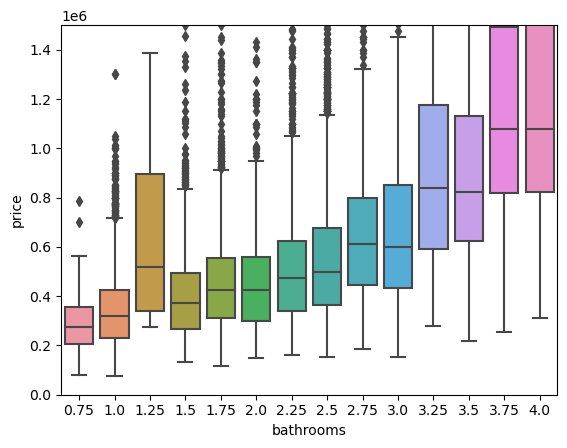

In [41]:
# Display box plot for 'bathrooms'
plot2 = sns.boxplot(x='bathrooms', y='price', data=dataset)
plot2.set(ylim=(0, 1500000))

[(0.0, 1500000.0)]

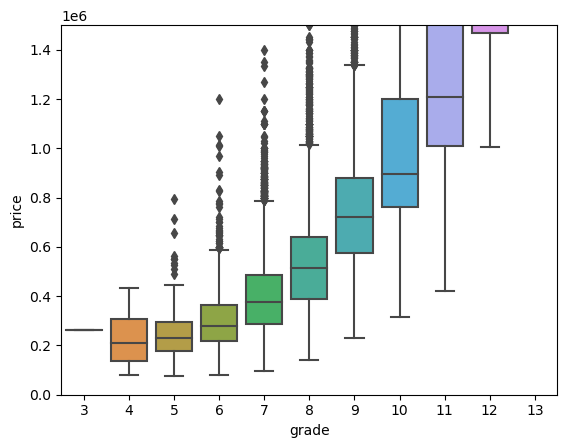

In [42]:
# Display box plot for 'grade'
plot3 = sns.boxplot(x='grade', y='price', data=dataset)
plot3.set(ylim=(0, 1500000))

[(0.0, 1500000.0)]

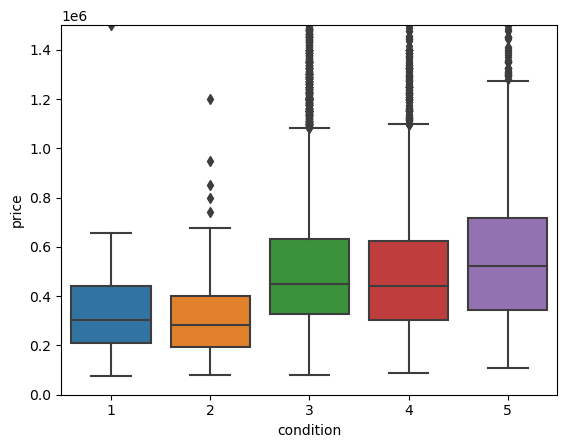

In [43]:
# Display box plot for 'condition'
plot4 = sns.boxplot(x='condition', y='price', data=dataset)
plot4.set(ylim=(0, 1500000))

[(0.0, 1500000.0)]

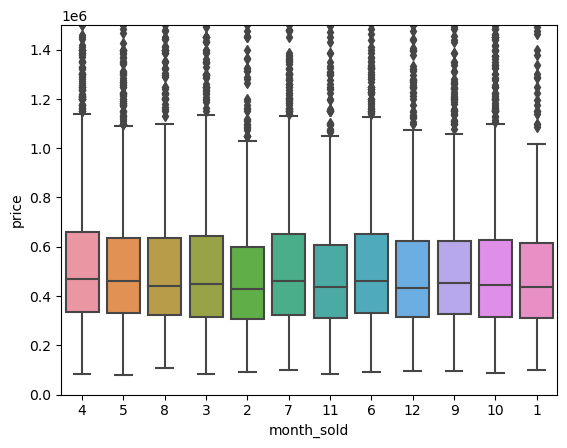

In [44]:
# Display box plot for 'month_sold'
plot5 = sns.boxplot(x='month_sold', y='price', data=dataset)
plot5.set(ylim=(0, 1500000))

[(0.0, 1500000.0)]

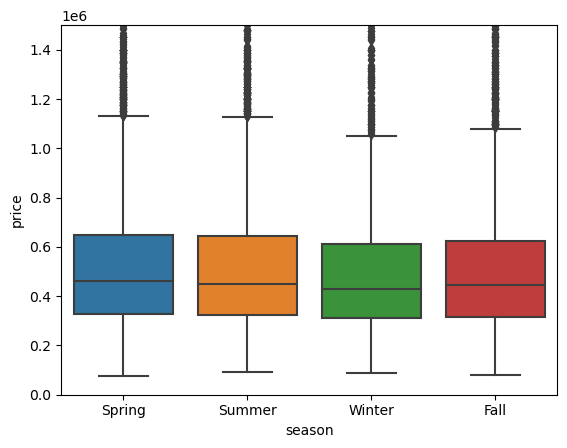

In [45]:
# Display box plot for 'month_sold'
plot5 = sns.boxplot(x='season', y='price', data=dataset)
plot5.set(ylim=(0, 1500000))

From the above box plots, we see that bathrooms, bedrooms, and grade affect the price with a certain degree of linear relationship, but condition does not.

### Joint Plot to show Distribution by Latiture and Longitude

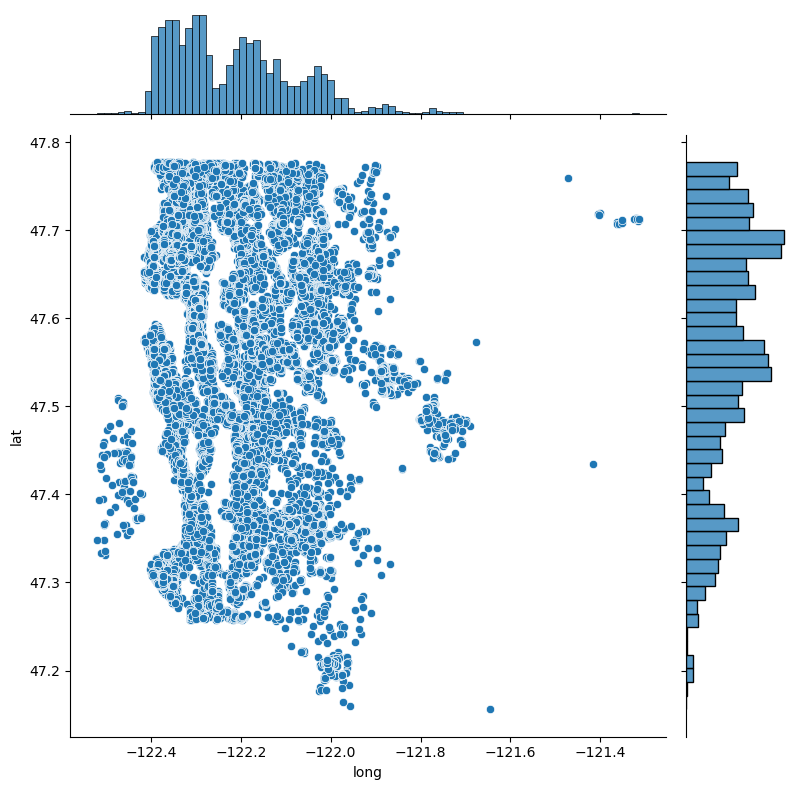

In [46]:
# Joint plot by long and lat
sns.jointplot(dataset['long'], dataset['lat'], size= 8)

### Remove outliers by location : long > -121.7

In [47]:
# Calculate outlier counts
upperlimit_set = -121.7
upperlimit_set_count = len(dataset[dataset.long > upperlimit_set])

dropped_count = len(dataset[dataset.long > upperlimit_set])
dropped_percent = dropped_count / len(dataset)
print(f"{dropped_count} rows ({round(100 * dropped_percent, 3)} percent of data) have been dropped.")


21 rows (0.11 percent of data) have been dropped.


In [48]:
# Remove outliers for long
dataset.drop(dataset[dataset.long > upperlimit_set].index, inplace=True)

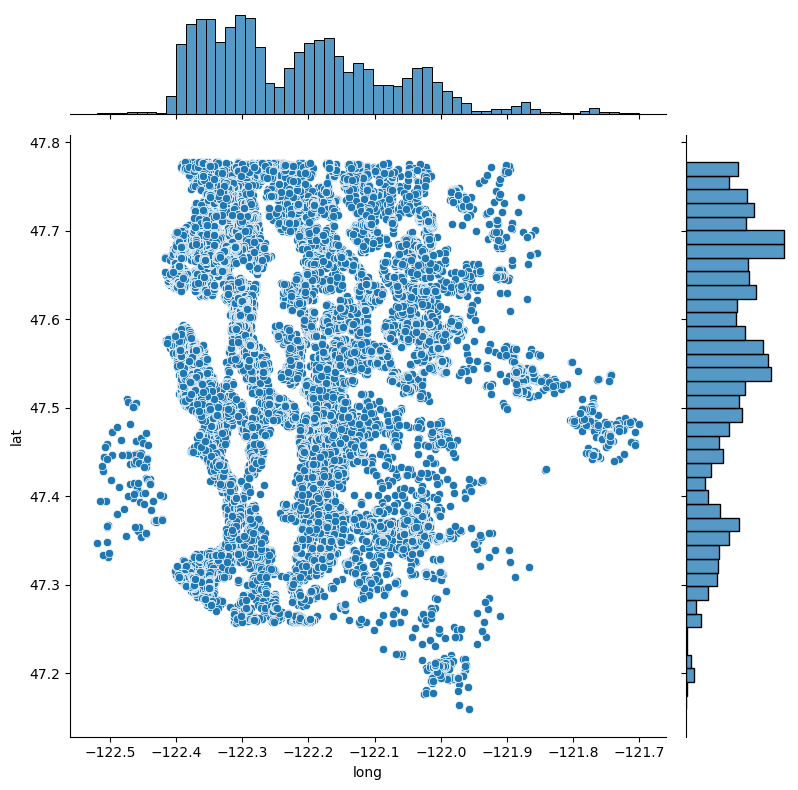

In [49]:
# Recreate joint plot
sns.jointplot(dataset['long'], dataset['lat'], size= 8)

## 4. Feature Engineering

### Feature Construction

#### * Generate Categories for lat, long, and latitude + longitude

[Text(0, 0, 'south-midwest'),
 Text(1, 0, 'central-midwest'),
 Text(2, 0, 'north-midwest'),
 Text(3, 0, 'north-central'),
 Text(4, 0, 'central-central'),
 Text(5, 0, 'central-west'),
 Text(6, 0, 'south-central'),
 Text(7, 0, 'north-west'),
 Text(8, 0, 'north-mideast'),
 Text(9, 0, 'south-west'),
 Text(10, 0, 'south-mideast'),
 Text(11, 0, 'central-mideast'),
 Text(12, 0, 'central-east'),
 Text(13, 0, 'north-east')]

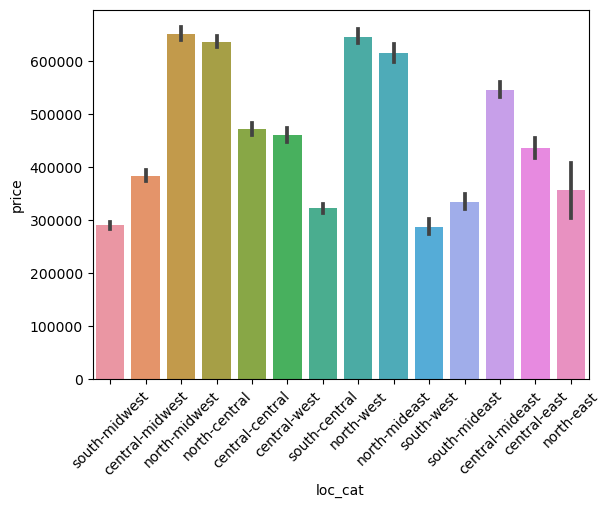

In [50]:
# Add column 'lat_cat' to represent the lattitude in three categories
dataset['lat_cat'] = pd.cut(dataset['lat'],3,labels = ['south', 'central', 'north'])
dataset.head()

# Add column 'long_cat' to represent the longitude in five categories
dataset['long_cat'] = pd.cut(dataset['long'],5,labels = ['west', 'midwest', 'central', 'mideast', 'east'])
dataset.head()

lat_cat = dataset['lat_cat']
long_cat = dataset['long_cat']

#aggregate the latitude and longitude together for a final location category
dataset['loc_cat'] = dataset[['lat_cat', 'long_cat']].agg('-'.join, axis=1)

location_category = dataset['loc_cat']
price = dataset['price']

#plot just to see
location_barplot = sns.barplot(x=location_category, y=price)
#makes it so the labels don't run into each other
location_barplot.set_xticklabels(location_barplot.get_xticklabels(), rotation = 45, horizontalalignment = 'center')

[Text(0, 0, 'south-central'),
 Text(1, 0, 'central-west'),
 Text(2, 0, 'north-west'),
 Text(3, 0, 'central-central'),
 Text(4, 0, 'north-central'),
 Text(5, 0, 'south-west'),
 Text(6, 0, 'north-east'),
 Text(7, 0, 'central-east'),
 Text(8, 0, 'south-east')]

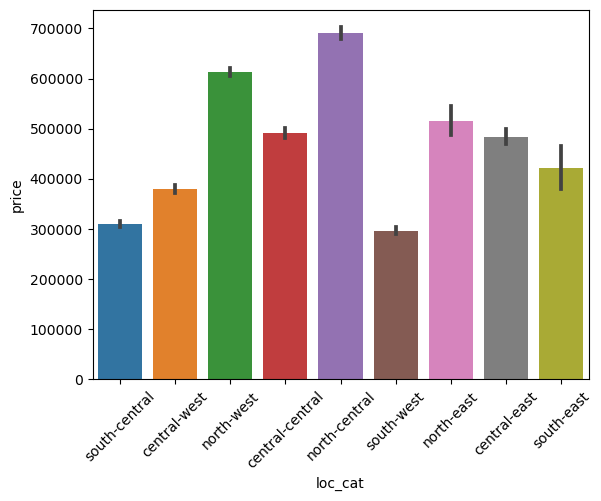

In [51]:
# Add column 'lat_cat' to represent the lattitude in three categories
dataset['lat_cat'] = pd.cut(dataset['lat'],3,labels = ['south', 'central', 'north'])
dataset.head()

# Add column 'long_cat' to represent the longitude in five categories
dataset['long_cat'] = pd.cut(dataset['long'],3,labels = ['west', 'central', 'east'])
dataset.head()

lat_cat = dataset['lat_cat']
long_cat = dataset['long_cat']

#aggregate the latitude and longitude together for a final location category
dataset['loc_cat'] = dataset[['lat_cat', 'long_cat']].agg('-'.join, axis=1)

location_category = dataset['loc_cat']
price = dataset['price']
#plot just to see
location_barplot = sns.barplot(x=location_category, y=price)
#makes it so the labels don't run into each other
location_barplot.set_xticklabels(location_barplot.get_xticklabels(), rotation = 45, horizontalalignment = 'center')

## Scaling Numerical Data

In [52]:
from sklearn import preprocessing
dataset['sqft_scale'] = preprocessing.scale(dataset['sqft_living'])
dataset['bd_scale'] = preprocessing.scale(dataset['bedrooms'])
dataset['ba_scale'] = preprocessing.scale(dataset['bathrooms'])
dataset['gr_scale'] = preprocessing.scale(dataset['grade'])
dataset['fl_scale'] = preprocessing.scale(dataset['floors'])

### Tests of Association (categorical)

In [53]:
dataset['price_log'] = np.sqrt(dataset['price'])
#cut dataset into 6 bins for price_log
dataset['price_log_cat'] = pd.cut(dataset['price_log'], 6)
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,price_log,lat_cat,long_cat,loc_cat,sqft_scale,bd_scale,ba_scale,gr_scale,fl_scale,price_log_cat
2497,1000102,2015-04-22,300000.0,6.0,3.00,2400.0,9373.0,2.0,0,0,...,547.722558,south,central,south-central,0.422553,3.067584,1.293117,-0.554853,0.955048,"(277.445, 585.858]"
6735,1200019,2014-05-08,647500.0,4.0,1.75,2060.0,26036.0,1.0,0,0,...,804.673847,central,west,central-west,0.019577,0.754422,-0.467265,0.331045,-0.908613,"(585.858, 892.432]"
8411,1200021,2014-08-11,400000.0,3.0,1.00,1460.0,43000.0,1.0,0,0,...,632.455532,central,west,central-west,-0.691557,-0.402159,-1.523494,-0.554853,-0.908613,"(585.858, 892.432]"
8809,2800031,2015-04-01,235000.0,3.0,1.00,1430.0,7599.0,1.5,0,0,...,484.767986,central,west,central-west,-0.727114,-0.402159,-1.523494,-1.440752,0.023217,"(277.445, 585.858]"
18521,3600072,2015-03-30,680000.0,4.0,2.75,2220.0,5310.0,1.0,0,0,...,824.621125,north,west,north-west,0.209213,0.754422,0.941040,-0.554853,-0.908613,"(585.858, 892.432]"


### Price and location (lat/long 3X3), lat only, long only.

In [54]:
chisq_freq_1_a = pd.crosstab(dataset['price_log_cat'], dataset['loc_cat'], margins=True, margins_name='Total')

#frequency table
chisq_freq_1_a

#run test to get stats and expected values
stats.chi2_contingency(chisq_freq_1_a)
#not valid, too many expected values below 5

(5813.79205438164,
 0.0,
 54,
 array([[1.06869627e+03, 1.56409081e+02, 8.83443689e+02, 1.22302386e+03,
         8.08807417e+01, 1.51235093e+03, 3.91320059e+02, 1.18942267e+01,
         3.16981142e+02, 5.64500000e+03],
        [2.05238906e+03, 3.00377476e+02, 1.69661878e+03, 2.34876912e+03,
         1.55328276e+02, 2.90441035e+03, 7.51514749e+02, 2.28423936e+01,
         6.08749789e+02, 1.08410000e+04],
        [3.95105247e+02, 5.78256426e+01, 3.26615940e+02, 4.52161346e+02,
         2.99022335e+01, 5.59127792e+02, 1.44674041e+02, 4.39738727e+00,
         1.17190371e+02, 2.08700000e+03],
        [6.32319848e+01, 9.25431943e+00, 5.22710704e+01, 7.23631479e+01,
         4.78550358e+00, 8.94818795e+01, 2.31533923e+01, 7.03750527e-01,
         1.87549515e+01, 3.34000000e+02],
        [1.32522124e+01, 1.93952802e+00, 1.09550147e+01, 1.51659292e+01,
         1.00294985e+00, 1.87536873e+01, 4.85250737e+00, 1.47492625e-01,
         3.93067847e+00, 7.00000000e+01],
        [1.32522124e+00, 1.939

In [55]:
chisq_freq_1_b = pd.crosstab(dataset['price_log_cat'], 
                           dataset['lat_cat'], 
                           margins=True, margins_name='Total')
chisq_freq_1_b

#run test
stats.chi2_contingency(chisq_freq_1_b)

#valid, stat sig, but df and x2 are far apart

(5230.462237344536,
 0.0,
 18,
 array([[7.20195428e+02, 2.10854904e+03, 2.81625553e+03, 5.64500000e+03],
        [1.38310693e+03, 4.04938532e+03, 5.40850774e+03, 1.08410000e+04],
        [2.66261799e+02, 7.79546829e+02, 1.04119137e+03, 2.08700000e+03],
        [4.26120944e+01, 1.24757375e+02, 1.66630531e+02, 3.34000000e+02],
        [8.93067847e+00, 2.61467552e+01, 3.49225664e+01, 7.00000000e+01],
        [8.93067847e-01, 2.61467552e+00, 3.49225664e+00, 7.00000000e+00],
        [2.42200000e+03, 7.09100000e+03, 9.47100000e+03, 1.89840000e+04]]))

In [56]:
chisq_freq_1_c = pd.crosstab(dataset['price_log_cat'], 
                           dataset['long_cat'], 
                           margins=True, margins_name='Total')
chisq_freq_1_c

#run test
stats.chi2_contingency(chisq_freq_1_c)

#not valid, one group expected value below 5

(205.7145632924511,
 7.191126026720951e-34,
 18,
 array([[2.71277576e+03, 2.68304019e+03, 2.49184050e+02, 5.64500000e+03],
        [5.20977892e+03, 5.15267294e+03, 4.78548146e+02, 1.08410000e+04],
        [1.00293410e+03, 9.91940634e+02, 9.21252634e+01, 2.08700000e+03],
        [1.60507901e+02, 1.58748525e+02, 1.47435735e+01, 3.34000000e+02],
        [3.36393805e+01, 3.32706490e+01, 3.08997050e+00, 7.00000000e+01],
        [3.36393805e+00, 3.32706490e+00, 3.08997050e-01, 7.00000000e+00],
        [9.12300000e+03, 9.02300000e+03, 8.38000000e+02, 1.89840000e+04]]))

### Price and renovation  status.

In [57]:
#create frequency table for price bins and renovation status
chisq_freq_2 = pd.crosstab(dataset['price_log_cat'].astype('category'), 
                           dataset['renovate'], 
                           margins=True, margins_name='Total')
#test chi square
chisq_freq_2
stats.chi2_contingency(chisq_freq_2)

### valid relationship between renovation and price


(327.88798882971673,
 6.422302197163328e-63,
 12,
 array([[5.40949431e+03, 2.35505689e+02, 5.64500000e+03],
        [1.03887206e+04, 4.52279393e+02, 1.08410000e+04],
        [1.99993173e+03, 8.70682680e+01, 2.08700000e+03],
        [3.20065740e+02, 1.39342604e+01, 3.34000000e+02],
        [6.70796460e+01, 2.92035398e+00, 7.00000000e+01],
        [6.70796460e+00, 2.92035398e-01, 7.00000000e+00],
        [1.81920000e+04, 7.92000000e+02, 1.89840000e+04]]))

### Price and year.

In [58]:
chisq_freq_3 = pd.crosstab(dataset['price_log_cat'].astype('category'), 
                           dataset['yr_sold'].astype('category'), 
                           margins=True, margins_name='Total')
#test chi square
chisq_freq_3
stats.chi2_contingency(chisq_freq_3)

#not valid, no difference

(5.3801652988285875,
 0.9440619307859195,
 12,
 array([[3.80912611e+03, 1.83587389e+03, 5.64500000e+03],
        [7.31527655e+03, 3.52572345e+03, 1.08410000e+04],
        [1.40826327e+03, 6.78736726e+02, 2.08700000e+03],
        [2.25376106e+02, 1.08623894e+02, 3.34000000e+02],
        [4.72345133e+01, 2.27654867e+01, 7.00000000e+01],
        [4.72345133e+00, 2.27654867e+00, 7.00000000e+00],
        [1.28100000e+04, 6.17400000e+03, 1.89840000e+04]]))

## 5. Data Modeling and Analytics

* Determine the need for a supervised or unsupervised learning method and identify dependent and independent variables
* Train, test, and provide accuracy and evaluation metrics for model results


### The model for data requires a supervised learning method: multinomial linear regression.

* The outcome variable is price (price_log).
* Tested predictor variables are : sqft_scale, season, renovation, loc, lat, fl_scale, bd_scale, ba_scale, gr_scale.

## Creating Dummy Variables

In [59]:
season_dum = pd.get_dummies(dataset['season'], prefix = 'sea')
season_dum

,sea_Fall,sea_Spring,sea_Summer,sea_Winter
2497,0,1,0,0
6735,0,1,0,0
8411,0,0,1,0
8809,0,1,0,0
18521,0,1,0,0
...,...,...,...,...
11654,1,0,0,0
16737,0,0,1,0
3260,0,1,0,0
7621,0,0,1,0


In [60]:
loc_dum = pd.get_dummies(dataset['loc_cat'], prefix = 'loc')
loc_dum

,loc_central-central,loc_central-east,loc_central-west,loc_north-central,loc_north-east,loc_north-west,loc_south-central,loc_south-east,loc_south-west
2497,0,0,0,0,0,0,1,0,0
6735,0,0,1,0,0,0,0,0,0
8411,0,0,1,0,0,0,0,0,0
8809,0,0,1,0,0,0,0,0,0
18521,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
11654,0,0,1,0,0,0,0,0,0
16737,0,0,1,0,0,0,0,0,0
3260,0,0,1,0,0,0,0,0,0
7621,0,0,1,0,0,0,0,0,0


In [61]:
lat_dum = pd.get_dummies(dataset['lat_cat'], prefix = 'lat')
lat_dum

,lat_south,lat_central,lat_north
2497,1,0,0
6735,0,1,0
8411,0,1,0
8809,0,1,0
18521,0,0,1
...,...,...,...
11654,0,1,0
16737,0,1,0
3260,0,1,0
7621,0,1,0


In [62]:
dataset_final = pd.concat([dataset, season_dum, lat_dum, loc_dum], axis = 1)
dataset_final.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat_north,loc_central-central,loc_central-east,loc_central-west,loc_north-central,loc_north-east,loc_north-west,loc_south-central,loc_south-east,loc_south-west
2497,1000102,2015-04-22,300000.0,6.0,3.00,2400.0,9373.0,2.0,0,0,...,0,0,0,0,0,0,0,1,0,0
6735,1200019,2014-05-08,647500.0,4.0,1.75,2060.0,26036.0,1.0,0,0,...,0,0,0,1,0,0,0,0,0,0
8411,1200021,2014-08-11,400000.0,3.0,1.00,1460.0,43000.0,1.0,0,0,...,0,0,0,1,0,0,0,0,0,0
8809,2800031,2015-04-01,235000.0,3.0,1.00,1430.0,7599.0,1.5,0,0,...,0,0,0,1,0,0,0,0,0,0
18521,3600072,2015-03-30,680000.0,4.0,2.75,2220.0,5310.0,1.0,0,0,...,1,0,0,0,0,0,1,0,0,0


## Building A Model
#### Step 1: define X and y and put into linear regression function.
#### Step 2: check IVF values to check for multicolinearity issues (remove variables as necessary)
#### Step 3: train the model with 75% of the data
#### Step 4: confirm appropriate R2 value and see what variables are not statistically significant, remove if necessary and re-do model
#### Step 5: test the model with 25% of the data
#### Step 6: graph predictions against observed values
#### Step 7: evaluate model with kfolds for mean absolute error (lower is better)
#### Step 8: refine model and update predictor variables, continue until optimal model is found


In [63]:
#import functions
from sklearn.linear_model import LinearRegression
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import OLS
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from numpy import mean
from numpy import absolute

# Model 1: All Variables
### Training Data

In [64]:
#'loc_central-central','loc_central-east', 'loc_central-west',
#'loc_north-central','loc_north-east','loc_north-west','loc_south-central',
#'loc_south-east'

X = dataset_final[['sqft_scale','fl_scale','bd_scale','ba_scale','gr_scale', 'lat_north','lat_central', 'renovate',
                   'sea_Winter','sea_Spring','sea_Summer']]
y = dataset_final[['price_log']]

model = LinearRegression().fit(X, y)
model.score(X,y)

0.6984591886534448

### Checking Variance Inflation Factors (VIFs) of selected variables

In [65]:
#find design matrix for model using 'price_sqrt' as response variable 
y, X = dmatrices('price_log~sqft_scale+fl_scale+bd_scale+ba_scale+gr_scale+lat_north+lat_central+renovate+sea_Winter+sea_Spring+sea_Summer',
                 data=dataset_final, return_type='dataframe')
#+loc_central-central+loc_central-east+loc_central-west+loc_north-central+loc_north-east+loc_north-west+loc_south-central',
#calculate the VIF for each explanatory variable (the explarotry values are
#listed after the ~ in line of code above, sepearated by '+'. Can play around)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

vif

,VIF,variable
0,11.230425,Intercept
1,3.671455,sqft_scale
2,1.454610,fl_scale
3,1.651025,bd_scale
4,2.657867,ba_scale
5,2.737054,gr_scale
6,2.510363,lat_north
7,2.469693,lat_central
8,1.008118,renovate
9,1.439939,sea_Winter


In [66]:
X_train, X_test, y_train, \
y_test = train_test_split(X, y, test_size = 0.25, random_state = 222)

In [67]:
train_shape = X_train.shape[0]
test_shape = X_test.shape[0]
train_percent = train_shape/(train_shape + test_shape)
test_percent = test_shape/(train_shape + test_shape)
print('Train Size:', train_percent) 
print('Test Size:', test_percent)

Train Size: 0.75
Test Size: 0.25


In [68]:
price_model = sm.add_constant(X_train)

In [69]:
price_model_results = OLS(y_train, X_train).fit()
price_model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     2938.
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        00:34:05   Log-Likelihood:                -86391.
No. Observations:               14238   AIC:                         1.728e+05
Df Residuals:                   14226   BIC:                         1.729e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     557.6796      2.936    189.945      0.000     551.925     563.435
sqft_scale     88.2916      1.677     52.653      0.000      85.005      91.578
fl_scale       -7.0687      1.063     -6.647      0.000      -9.153      -4.984
bd_scale      -10.2215      1.121     -9.122      0.000     -12.418      -8.025
ba_scale       -2.3756      1.422     -1.671      0.095      -5.162       0.411
gr_scale       61.9236      1.444     42.891      0.000      59.094      64.754
lat_north     200.7500      2.770     72.464      0.000     195.320     206.180
lat_central    94.2662      2.839     33.202      0.000      88.701      99.831
renovate       77.9413      4.387     17.766      0.000      69.342      86.541
sea_Winter     -1.2168      2.793     -0.436      0.663      -6.691       4.257
sea_Spring     14.8725      2.418      6.150      0.000      10.132      19.613
sea_Summer      0.8589      2.441      0.352      0.725      -3.926       5.644
==============================================================================
Omnibus:                     3313.567   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11546.620
Skew:                           1.152   Prob(JB):                         0.00
Kurtosis:                       6.762   Cond. No.                         9.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
price_mod = LinearRegression()
price_mod.fit(X_train, y_train)
y_pred = price_mod.predict(X_test)

<AxesSubplot:title={'center':'Model 1: Linear Relationship Between Y-observed and Y-Predicted'}, xlabel='Price_Log Observed', ylabel='Price_Log Predicted'>

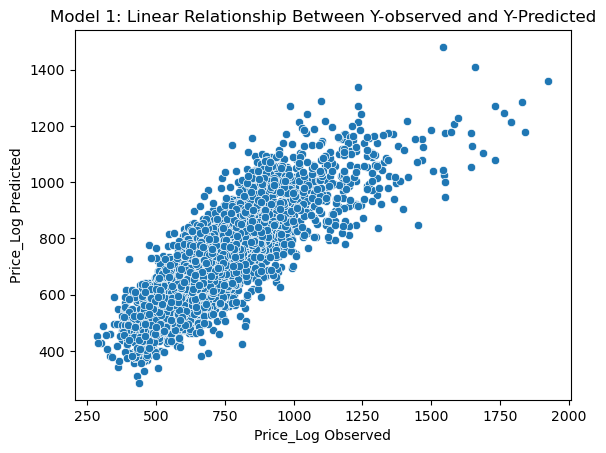

In [71]:
#plot observations vs. predictions, linearity confirmed
y_test_ar = pd.array(y_test['price_log'])
plot_df_x = pd.DataFrame(y_test_ar, columns = ['Price_Log'])
plot_df_y = pd.DataFrame(y_pred, columns = ['Price_Log Prediction'])
plot_df = pd.concat([plot_df_x, plot_df_y], axis = 1)
plot_df
plt.figure()
plt.title('Model 1: Linear Relationship Between Y-observed and Y-Predicted')
plt.xlabel('Price_Log Observed')
plt.ylabel('Price_Log Predicted')
sns.scatterplot(plot_df['Price_Log'], plot_df['Price_Log Prediction'])

In [72]:
#evaluate model with MAE
mean_absolute_error(y_test, y_pred)

75.85003804062276

In [73]:
#evaluate model with kfolds
cv = KFold(n_splits=5, random_state=222, shuffle=True)
scores = cross_val_score(price_mod, X_train, y_train, 
                         scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

# view mean absolute error
ma_scores = mean(absolute(scores))
ma_scores

77.10888253462208

# Model 2: Remove Season and Bathrooms due to non-significance 

In [74]:
X2 = dataset_final[['sqft_scale','fl_scale','bd_scale','gr_scale', 'lat_north','lat_central', 'renovate']]
y2 = dataset_final[['price_log']]

model2 = LinearRegression().fit(X2, y2)
model2.score(X2,y2)

0.696915049198402

In [75]:
#find design matrix for model using 'price_sqrt' as response variable 
y2, X2 = dmatrices('price_log~sqft_scale+fl_scale+bd_scale+gr_scale+lat_north+lat_central+renovate',
                 data=dataset_final, return_type='dataframe')

#listed after the ~ in line of code above, sepearated by '+'. Can play around)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif['variable'] = X2.columns

vif

,VIF,variable
0,7.898278,Intercept
1,3.191955,sqft_scale
2,1.267985,fl_scale
3,1.587914,bd_scale
4,2.670194,gr_scale
5,2.500832,lat_north
6,2.465218,lat_central
7,1.007136,renovate


In [76]:
X2_train, X2_test, y2_train, \
y2_test = train_test_split(X2, y2, test_size = 0.25, random_state = 222)

In [77]:
train_shape = X2_train.shape[0]
test_shape = X2_test.shape[0]
train_percent = train_shape/(train_shape + test_shape)
test_percent = test_shape/(train_shape + test_shape)
print('Train Size:', train_percent) 
print('Test Size:', test_percent)

Train Size: 0.75
Test Size: 0.25


In [78]:
price_model2 = sm.add_constant(X2_train)

In [79]:
price_model2_results = OLS(y2_train, X2_train).fit()
price_model2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     4589.
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        00:34:10   Log-Likelihood:                -86423.
No. Observations:               14238   AIC:                         1.729e+05
Df Residuals:                   14230   BIC:                         1.729e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     561.7804      2.461    228.231      0.000     556.956     566.605
sqft_scale     87.0639      1.567     55.565      0.000      83.993      90.135
fl_scale       -7.7757      0.996     -7.809      0.000      -9.728      -5.824
bd_scale      -10.5644      1.101     -9.594      0.000     -12.723      -8.406
gr_scale       61.7180      1.430     43.173      0.000      58.916      64.520
lat_north     201.2850      2.771     72.642      0.000     195.854     206.716
lat_central    94.8837      2.843     33.380      0.000      89.312     100.455
renovate       77.8021      4.394     17.706      0.000      69.189      86.415
==============================================================================
Omnibus:                     3336.394   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11541.481
Skew:                           1.162   Prob(JB):                         0.00
Kurtosis:                       6.748   Cond. No.                         7.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
price_mod2 = LinearRegression()
price_mod2.fit(X2_train, y2_train)
y2_pred = price_mod2.predict(X2_test)

<AxesSubplot:title={'center':'Model 2: Linear Relationship Between Y-observed and Y-Predicted'}, xlabel='Price_Log Observed', ylabel='Price_Log Predicted'>

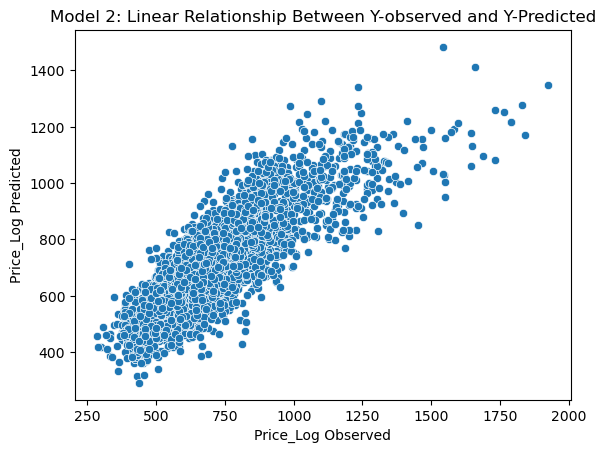

In [81]:
#plot observations vs. predictions, linearity confirmed
y2_test_ar = pd.array(y2_test['price_log'])
plot_df_x2 = pd.DataFrame(y2_test_ar, columns = ['Price_Log'])
plot_df_y2 = pd.DataFrame(y2_pred, columns = ['Price_Log Prediction'])
plot_df2 = pd.concat([plot_df_x2, plot_df_y2], axis = 1)
plot_df2
plt.figure()
plt.title('Model 2: Linear Relationship Between Y-observed and Y-Predicted')
plt.xlabel('Price_Log Observed')
plt.ylabel('Price_Log Predicted')
sns.scatterplot(plot_df2['Price_Log'], plot_df2['Price_Log Prediction'])

In [82]:
#evaluate model with MAE
mean_absolute_error(y2_test, y2_pred)

76.05218132652406

In [83]:
#evaluate model with kfolds
cv2 = KFold(n_splits=5, random_state=222, shuffle=True)
scores2 = cross_val_score(price_mod2, X2_train, y2_train, 
                         scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

# view mean absolute error
ma_scores2 = mean(absolute(scores2))
ma_scores2

77.23041276667558

#  Model 3: Remove Renovation due to low contribution to variance

In [84]:
X3 = dataset_final[['sqft_scale','fl_scale','bd_scale','gr_scale', 'lat_north','lat_central']]
y3 = dataset_final[['price_log']]

model3 = LinearRegression().fit(X3, y3)
model3.score(X3,y3)

0.6901039545845007

In [85]:
#find design matrix for model using 'price_sqrt' as response variable 
y3, X3 = dmatrices('price_log~sqft_scale+fl_scale+bd_scale+gr_scale+lat_north+lat_central',
                 data=dataset_final, return_type='dataframe')

#listed after the ~ in line of code above, sepearated by '+'. Can play around)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif['variable'] = X3.columns

vif

,VIF,variable
0,7.883871,Intercept
1,3.176115,sqft_scale
2,1.267973,fl_scale
3,1.586891,bd_scale
4,2.663716,gr_scale
5,2.496439,lat_north
6,2.464313,lat_central


In [86]:
X3_train, X3_test, y3_train, \
y3_test = train_test_split(X3, y3, test_size = 0.25, random_state = 222)

In [87]:
train_shape = X3_train.shape[0]
test_shape = X3_test.shape[0]
train_percent = train_shape/(train_shape + test_shape)
test_percent = test_shape/(train_shape + test_shape)
print('Train Size:', train_percent) 
print('Test Size:', test_percent)

Train Size: 0.75
Test Size: 0.25


In [88]:
price_model3 = sm.add_constant(X3_train)

In [89]:
price_model3_results = OLS(y3_train, X3_train).fit()
price_model3_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     5187.
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        00:34:14   Log-Likelihood:                -86578.
No. Observations:               14238   AIC:                         1.732e+05
Df Residuals:                   14231   BIC:                         1.732e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     563.7427      2.486    226.784      0.000     558.870     568.615
sqft_scale     88.7859      1.581     56.161      0.000      85.687      91.885
fl_scale       -7.8259      1.007     -7.774      0.000      -9.799      -5.853
bd_scale      -11.0514      1.113     -9.931      0.000     -13.233      -8.870
gr_scale       60.6442      1.444     42.002      0.000      57.814      63.474
lat_north     203.1826      2.799     72.590      0.000     197.696     208.669
lat_central    95.8294      2.873     33.354      0.000      90.198     101.461
==============================================================================
Omnibus:                     3482.861   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12316.070
Skew:                           1.206   Prob(JB):                         0.00
Kurtosis:                       6.865   Cond. No.                         7.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
price_mod3 = LinearRegression()
price_mod3.fit(X3_train, y3_train)
y3_pred = price_mod3.predict(X3_test)

<AxesSubplot:title={'center':'Model 3: Linear Relationship Between Y-observed and Y-Predicted'}, xlabel='Price_Log Observed', ylabel='Price_Log Predicted'>

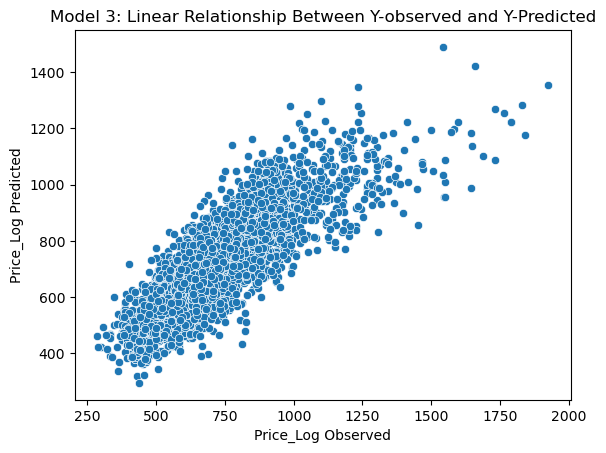

In [91]:
#plot observations vs. predictions, linearity confirmed
y3_test_ar = pd.array(y3_test['price_log'])
plot_df_x3 = pd.DataFrame(y3_test_ar, columns = ['Price_Log'])
plot_df_y3 = pd.DataFrame(y3_pred, columns = ['Price_Log Prediction'])
plot_df3 = pd.concat([plot_df_x3, plot_df_y3], axis = 1)
plot_df3
plt.figure()
plt.title('Model 3: Linear Relationship Between Y-observed and Y-Predicted')
plt.xlabel('Price_Log Observed')
plt.ylabel('Price_Log Predicted')
sns.scatterplot(plot_df3['Price_Log'], plot_df3['Price_Log Prediction'])

In [92]:
#evaluate model with MAE
mean_absolute_error(y3_test, y3_pred)

76.75324912301733

In [93]:
#evaluate model with kfolds
cv3 = KFold(n_splits=5, random_state=222, shuffle=True)
scores3 = cross_val_score(price_mod3, X3_train, y3_train, 
                         scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

# view mean absolute error
ma_scores3 = mean(absolute(scores3))
ma_scores3

77.94888397344246

# Model 4: Remove Floors and Bedrooms since they contribute to small amount of variance

In [94]:
X4 = dataset_final[['sqft_scale','gr_scale', 'lat_north','lat_central']]
y4 = dataset_final[['price_log']]

model4 = LinearRegression().fit(X4, y4)
model4.score(X4,y4)

0.6861730118260587

In [95]:
#find design matrix for model using 'price_sqrt' as response variable 
y4, X4 = dmatrices('price_log~sqft_scale+gr_scale+lat_north+lat_central',
                 data=dataset_final, return_type='dataframe')

#listed after the ~ in line of code above, sepearated by '+'. Can play around)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])]
vif['variable'] = X4.columns
vif

,VIF,variable
0,7.870898,Intercept
1,2.306916,sqft_scale
2,2.351272,gr_scale
3,2.491560,lat_north
4,2.461022,lat_central


In [96]:
X4_train, X4_test, y4_train, \
y4_test = train_test_split(X4, y4, test_size = 0.25, random_state = 222)

In [97]:
train_shape = X4_train.shape[0]
test_shape = X4_test.shape[0]
train_percent = train_shape/(train_shape + test_shape)
test_percent = test_shape/(train_shape + test_shape)
print('Train Size:', train_percent) 
print('Test Size:', test_percent)

Train Size: 0.75
Test Size: 0.25


In [98]:
price_model4 = sm.add_constant(X4_train)

In [99]:
price_model4_results = OLS(y4_train, X4_train).fit()
price_model4_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     7657.
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        00:34:17   Log-Likelihood:                -86658.
No. Observations:               14238   AIC:                         1.733e+05
Df Residuals:                   14233   BIC:                         1.734e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     562.8309      2.498    225.324      0.000     557.935     567.727
sqft_scale     80.3771      1.358     59.189      0.000      77.715      83.039
gr_scale       59.2543      1.366     43.389      0.000      56.577      61.931
lat_north     204.1945      2.813     72.600      0.000     198.681     209.708
lat_central    96.6972      2.887     33.489      0.000      91.037     102.357
==============================================================================
Omnibus:                     3670.918   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13488.989
Skew:                           1.259   Prob(JB):                         0.00
Kurtosis:                       7.049   Cond. No.                         6.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
price_mod4 = LinearRegression()
price_mod4.fit(X4_train, y4_train)
y4_pred = price_mod4.predict(X4_test)

<AxesSubplot:title={'center':'Model 4: Linear Relationship Between Y-observed and Y-Predicted'}, xlabel='Price_Log Observed', ylabel='Price_Log Predicted'>

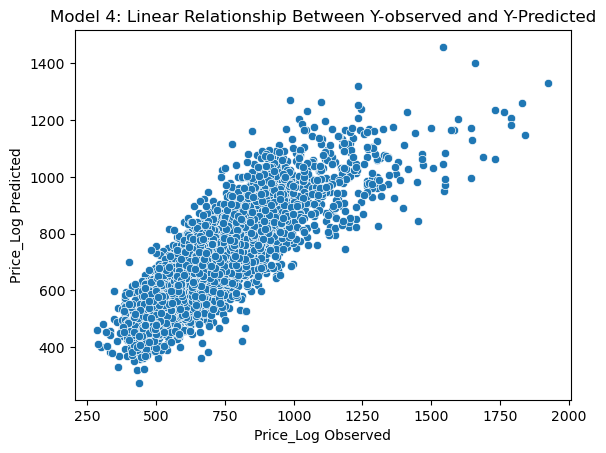

In [101]:
#plot observations vs. predictions, linearity confirmed
y4_test_ar = pd.array(y4_test['price_log'])
plot_df_x4 = pd.DataFrame(y4_test_ar, columns = ['Price_Log'])
plot_df_y4 = pd.DataFrame(y4_pred, columns = ['Price_Log Prediction'])
plot_df4 = pd.concat([plot_df_x4, plot_df_y4], axis = 1)
plot_df4
plt.figure()
plt.title('Model 4: Linear Relationship Between Y-observed and Y-Predicted')
plt.xlabel('Price_Log Observed')
plt.ylabel('Price_Log Predicted')
sns.scatterplot(plot_df4['Price_Log'], plot_df4['Price_Log Prediction'])

In [102]:
#evaluate model with MAE
mean_absolute_error(y4_test, y4_pred)

77.33182223634708

In [103]:
#evaluate model with kfolds
cv4 = KFold(n_splits=5, random_state=222, shuffle=True)
scores4 = cross_val_score(price_mod4, X4_train, y4_train, 
                         scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

# view mean absolute error
ma_scores4 = mean(absolute(scores4))
ma_scores4

78.33652822428421

# Model 5: Remove all categorical variables

In [104]:
X5 = dataset_final[['sqft_scale','gr_scale']]
y5 = dataset_final[['price_log']]

model5 = LinearRegression().fit(X5, y5)
model5.score(X5,y5)

0.5428432573487167

In [105]:
#find design matrix for model using 'price_sqrt' as response variable 
y5, X5 = dmatrices('price_log~sqft_scale+gr_scale',
                 data=dataset_final, return_type='dataframe')

#listed after the ~ in line of code above, sepearated by '+'. Can play around)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X5.values, i) for i in range(X5.shape[1])]
vif['variable'] = X5.columns
vif

,VIF,variable
0,1.000000,Intercept
1,2.294593,sqft_scale
2,2.294593,gr_scale


In [106]:
X5_train, X5_test, y5_train, \
y5_test = train_test_split(X5, y5, test_size = 0.25, random_state = 222)

In [107]:
train_shape = X5_train.shape[0]
test_shape = X5_test.shape[0]
train_percent = train_shape/(train_shape + test_shape)
test_percent = test_shape/(train_shape + test_shape)
print('Train Size:', train_percent) 
print('Test Size:', test_percent)

Train Size: 0.75
Test Size: 0.25


In [108]:
price_model5 = sm.add_constant(X5_train)

In [109]:
price_model5_results = OLS(y5_train, X5_train).fit()
price_model5_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     8320.
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        00:34:20   Log-Likelihood:                -89318.
No. Observations:               14238   AIC:                         1.786e+05
Df Residuals:                   14235   BIC:                         1.787e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    700.5695      1.075    651.543      0.000     698.462     702.677
sqft_scale    73.8909      1.633     45.252      0.000      70.690      77.092
gr_scale      74.3515      1.627     45.703      0.000      71.163      77.540
==============================================================================
Omnibus:                     1983.754   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4133.971
Skew:                           0.852   Prob(JB):                         0.00
Kurtosis:                       5.016   Cond. No.                         2.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
price_mod5 = LinearRegression()
price_mod5.fit(X5_train, y5_train)
y5_pred = price_mod5.predict(X5_test)

<AxesSubplot:title={'center':'Model 5: Linear Relationship Between Y-observed and Y-Predicted'}, xlabel='Price_Log Observed', ylabel='Price_Log Predicted'>

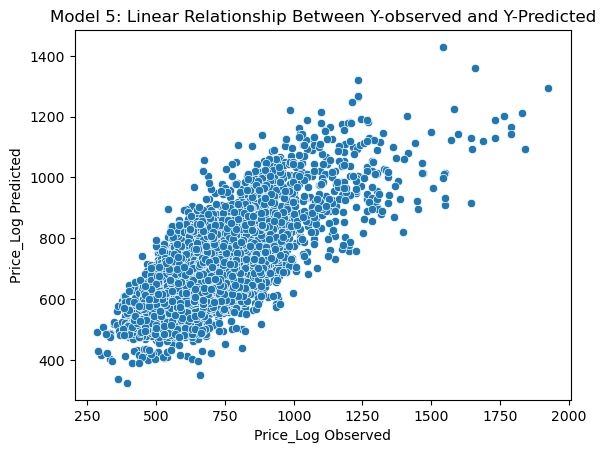

In [111]:
#plot observations vs. predictions, linearity confirmed
y5_test_ar = pd.array(y5_test['price_log'])
plot_df_x5 = pd.DataFrame(y5_test_ar, columns = ['Price_Log'])
plot_df_y5 = pd.DataFrame(y5_pred, columns = ['Price_Log Prediction'])
plot_df5 = pd.concat([plot_df_x5, plot_df_y5], axis = 1)
plot_df5
plt.figure()
plt.title('Model 5: Linear Relationship Between Y-observed and Y-Predicted')
plt.xlabel('Price_Log Observed')
plt.ylabel('Price_Log Predicted')
sns.scatterplot(plot_df5['Price_Log'], plot_df5['Price_Log Prediction'])

In [112]:
#evaluate model with MAE
mean_absolute_error(y5_test, y5_pred)

98.52460432224893

In [113]:
#evaluate model with kfolds
cv5 = KFold(n_splits=5, random_state=222, shuffle=True)
scores5 = cross_val_score(price_mod5, X5_train, y5_train, 
                         scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

# view mean absolute error
ma_scores5 = mean(absolute(scores5))
ma_scores5

98.42771791516574

# Model 6: Square footage and lattitude location.

In [114]:
X6 = dataset_final[['sqft_scale','lat_north','lat_central']]
y6 = dataset_final[['price_log']]

model6 = LinearRegression().fit(X6, y6)
model6.score(X6,y6)

0.6439280983988747

In [115]:
#find design matrix for model using 'price_sqrt' as response variable 
y6, x6 = dmatrices('price_log~sqft_scale+lat_north+lat_central',
                 data=dataset_final, return_type='dataframe')

#listed after the ~ in line of code above, sepearated by '+'. Can play around)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X6.values, i) for i in range(X6.shape[1])]
vif['variable'] = X6.columns
vif

,VIF,variable
0,1.003547,sqft_scale
1,1.002311,lat_north
2,1.001236,lat_central


In [116]:
X6_train, X6_test, y6_train, \
y6_test = train_test_split(X6, y6, test_size = 0.25, random_state = 222)

In [117]:
train_shape = X6_train.shape[0]
test_shape = X6_test.shape[0]
train_percent = train_shape/(train_shape + test_shape)
test_percent = test_shape/(train_shape + test_shape)
print('Train Size:', train_percent) 
print('Test Size:', test_percent)

Train Size: 0.75
Test Size: 0.25


In [118]:
price_model6 = sm.add_constant(X6_train)

In [119]:
price_model6_results = OLS(y6_train, X6_train).fit()
price_model6_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              price_log   R-squared (uncentered):                   0.900
Model:                            OLS   Adj. R-squared (uncentered):              0.900
Method:                 Least Squares   F-statistic:                          4.281e+04
Date:                Fri, 09 Dec 2022   Prob (F-statistic):                        0.00
Time:                        00:34:21   Log-Likelihood:                         -97579.
No. Observations:               14238   AIC:                                  1.952e+05
Df Residuals:                   14235   BIC:                                  1.952e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_scale    117.9659      1.928     61.175      0.000     114.186     121.746
lat_north     773.5113      2.728    283.538      0.000     768.164     778.859
lat_central   653.0744      3.139    208.071      0.000     646.922     659.227
==============================================================================
Omnibus:                     2942.351   Durbin-Watson:                   1.791
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5122.949
Skew:                           1.384   Prob(JB):                         0.00
Kurtosis:                       3.986   Cond. No.                         1.63
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
price_mod6 = LinearRegression()
price_mod6.fit(X6_train, y6_train)
y6_pred = price_mod6.predict(X6_test)

<AxesSubplot:title={'center':'Model 6: Linear Relationship Between Y-observed and Y-Predicted'}, xlabel='Price_Log Observed', ylabel='Price_Log Predicted'>

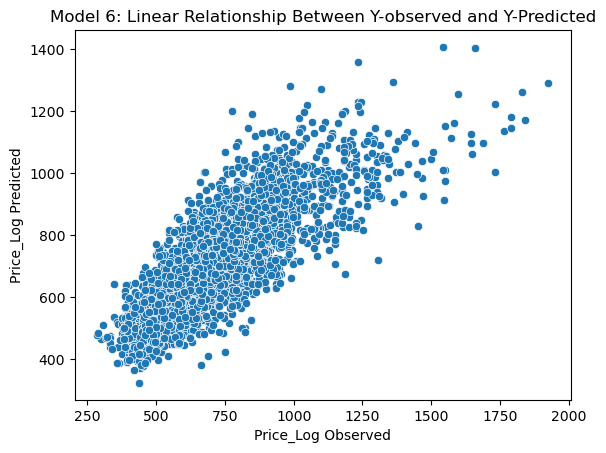

In [121]:
#plot observations vs. predictions, linearity confirmed
y6_test_ar = pd.array(y6_test['price_log'])
plot_df_x6 = pd.DataFrame(y6_test_ar, columns = ['Price_Log'])
plot_df_y6 = pd.DataFrame(y6_pred, columns = ['Price_Log Prediction'])
plot_df6 = pd.concat([plot_df_x6, plot_df_y6], axis = 1)
plot_df6
plt.figure()
plt.title('Model 6: Linear Relationship Between Y-observed and Y-Predicted')
plt.xlabel('Price_Log Observed')
plt.ylabel('Price_Log Predicted')
sns.scatterplot(plot_df6['Price_Log'], plot_df6['Price_Log Prediction'])

In [122]:
#evaluate model with MAE
mean_absolute_error(y6_test, y6_pred)

82.56906296146452

In [123]:
#evaluate model with kfolds
cv6 = KFold(n_splits=5, random_state=222, shuffle=True)
scores6 = cross_val_score(price_mod6, X6_train, y6_train, 
                         scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

# view mean absolute error
ma_scores6 = mean(absolute(scores6))
ma_scores6

82.99335305189943

## Final Model Visualizations and Equation

## 6. Conclusion

### Example Prediction

In [125]:
#model.predict([[]])

## References